## 1. importar los archivos .csv con los dos tipos de nodos y los arcos en Python, crear la red bipartita con la librería networkx

In [1]:
#Carga librerías importantes
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import operator
import pip
import csv
import pickle
import operator
from networkx.algorithms import bipartite

In [2]:
#Read Homicides network

#Create empty network

homicidios_net= nx.Graph()

homicidios=csv.reader(open('./Edges_homicides.csv'))
#read nodes and edges
for row in homicidios:
    homicidios_net.add_node(row[0],bipartite=0)
    homicidios_net.add_node(row[1],bipartite=1)
    if (row[0],row[1]) in homicidios_net.edges():
        homicidios_net.edge[row[0]][row[1]]['n_casos']=homicidios_net.edge[row[0]][row[1]]['n_casos']+1
    else:
        homicidios_net.add_edge(row[0],row[1])
        homicidios_net.edge[row[0]][row[1]]['n_casos']=1

print('La red tiene ',homicidios_net.number_of_nodes(),'nodos y ',homicidios_net.number_of_edges(),'arcos')

La red tiene  1072 nodos y  3513 arcos


### 1.A. Realizar la proyección de la red de manera que el patrón del homicidio sea el nodo original y la ciudad el grupo.

In [3]:
patrones = set(nodes for nodes,tipo in homicidios_net.nodes(data=True) if tipo['bipartite']==1)
patrones_net= bipartite.projected_graph(homicidios_net,patrones)
print('La red tiene ',patrones_net.number_of_nodes(),'nodos y ',patrones_net.number_of_edges(),'arcos')



La red tiene  99 nodos y  1615 arcos


### 1.B. Realizar la proyección de la red. entiéndase la ciudad como nodo original y al patrón del homicidio como grupo.

In [4]:
ciudades = set(nodes for nodes,tipo in homicidios_net.nodes(data=True) if tipo['bipartite']==0)
ciudades_net= bipartite.projected_graph(homicidios_net,ciudades)
print('La red tiene ',ciudades_net.number_of_nodes(),'nodos y ',ciudades_net.number_of_edges(),'arcos')

La red tiene  973 nodos y  302529 arcos


### 2.A Encontrar las medidas de centralidad: Grado promedio, coeficiente de clusteringpromedio, diámetro y densidad.

In [5]:
##############################GRADO PROMEDIO ###########################################################
#Patrones
grado_p=patrones_net.degree()
grado_promedio_simple= sum(grado_p.values())/patrones_net.number_of_nodes()
print('El grado promedio de la red de patrones es: ', grado_promedio_simple)
#Ciudades
grado2=ciudades_net.degree()
grado2_promedio_simple= sum(grado2.values())/ciudades_net.number_of_nodes()
print('El grado promedio de conexiones en la red de ciudades es: ', grado2_promedio_simple)

################################CLUSTERING PROMEDIO##########################################################

#patrones
trans_p=nx. average_clustering(patrones_net)
print('La transitividad promedio en la red de patrones es:',trans_p)

#ciudades
trans_c=nx. average_clustering(ciudades_net)
print('La transitividad promedio en la red de ciudades es:',trans_c)
##############################DIAMETRO##########################################################
#Patrones
maximo_conectado_p=max(nx.connected_component_subgraphs(patrones_net),key=len)
diametro_p=nx.diameter(maximo_conectado_p)
print('El diámetro de la red de patrones es:',diametro_p)
#ciudaes
maximo_conectado_c=max(nx.connected_component_subgraphs(ciudades_net),key=len)
diametro_c=nx.diameter(maximo_conectado_c)
print('El diámetro de la red de ciudades es:', diametro_c)
##############################DENSIDAD###################################################################

#patrones
densidad_p= nx.density(patrones_net)
print('La densidad de la red de patrones es:', densidad_p)

#ciudades
densidad_c=nx.density(ciudades_net)
print('La densidad de la red de ciudades es:', densidad_c)

El grado promedio de la red de patrones es:  32.62626262626262
El grado promedio de conexiones en la red de ciudades es:  621.8478931140802
La transitividad promedio en la red de patrones es: 0.817604883795859
La transitividad promedio en la red de ciudades es: 0.8940908129605709
El diámetro de la red de patrones es: 3
El diámetro de la red de ciudades es: 3
La densidad de la red de patrones es: 0.33292104720676147
La densidad de la red de ciudades es: 0.6397612069074898


### 2.B. Encontrar la distribución del grado de cada red.

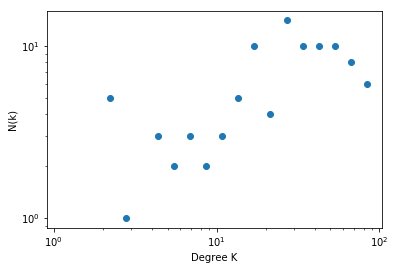

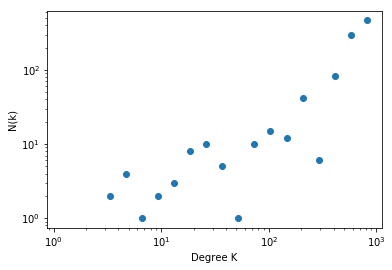

In [7]:
def plot_degree(G,marker):
    degrees=list(G.degree().values())
    #print(degrees)
    bins=np.logspace(0,np.log10(max(degrees)),21)
    #print(bins)
    (n, x)=np.histogram(degrees,bins)
    x=(x[1:] + x[0:-1])/2
    plt.loglog(x,n,marker)
    plt.xlabel('Degree K')
    plt.ylabel('N(k)')
    plt.show()
#Patrones
plot_degree(patrones_net,'o')
#Ciudades
plot_degree(ciudades_net,'o')